# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

## **Importing Libraries**

In [1]:
# Library for statistical analysis
import numpy as np
# Library for data analysis
import pandas as pd
# Library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Library for train-test split
from sklearn.model_selection import train_test_split
# Library for mutual information calculation
from sklearn.feature_selection import mutual_info_classif
# Library for feature scaling
from sklearn.preprocessing import MinMaxScaler
# Library for model building
from sklearn.ensemble import RandomForestClassifier
# Library for model evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

## **Data Analysis and Cleaning**

In [2]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0
49999,1,Internet,RoundTrip,19,6,10,Thu,PERPNH,Australia,0,1,0,5.62,0


In [4]:
df.shape

(50000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking



In [6]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [7]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

Hence there are no leading spaces between columns

In [8]:
#Converting flight_day column to a numerical column using mapping
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [9]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [10]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [11]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [12]:
df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

42,522 people have completed the booking

## **Extract independent and categorical columns**

In [13]:
x = df.drop(columns='booking_complete',axis=1)
y = df['booking_complete']

In [14]:
x.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: booking_complete, dtype: int64

In [16]:
#changing object dtype to int dtype
for colname in x.select_dtypes('object'):
  x[colname],_ = x[colname].factorize()

In [17]:
x.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

All columns have been converted into int dtype

## **Mutual Information**

In [18]:
mi_scores = mutual_info_classif(x,y)
mi_scores = pd.Series(mi_scores,name='Mutual information scores',index=x.columns)
mi_scores = mi_scores.sort_values(ascending = False)
mi_scores

route                    0.052224
booking_origin           0.045110
flight_duration          0.017389
wants_extra_baggage      0.011534
length_of_stay           0.008774
flight_hour              0.003859
purchase_lead            0.003506
wants_in_flight_meals    0.002655
trip_type                0.002119
flight_day               0.002002
num_passengers           0.001967
wants_preferred_seat     0.001534
sales_channel            0.000270
Name: Mutual information scores, dtype: float64

## **Visualization**

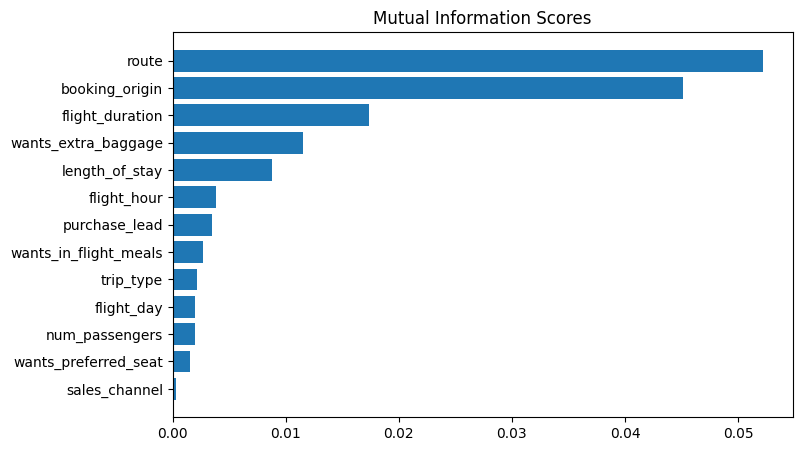

In [19]:
def plot_mi_scores(scores):
    scores = scores.sort_values()
    width = np.arange(len(scores))
    ticks = list(scores.index)
    # barh gives you a horizontal bar plot
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(figsize=(8, 5))
plot_mi_scores(mi_scores)

As we can see "route", "booking_origin" , "flight_duration" , "wants_extra_baggage", "length_of_stay" are the five features which are dependant with "booking_complete" feature

## **Train-test split**

In [20]:
# We are creating a function to split our data
def dataset(x,y):
    train_full_x, val_x, train_full_y, val_y = train_test_split(x, y,train_size=0.7,random_state = 10)

# Use the same function above for the validation set
    train_x, test_x, train_y, test_y = train_test_split(train_full_x, train_full_y, train_size=0.7,random_state = 10)
    return (train_x, val_x, train_y, val_y)

In [34]:
print(x.shape,train_full_x.shape,test_x.shape)

(50000, 917) (35000, 917) (15000, 917)


## **Feature Scaling**

In [21]:
#Using MinMax Scaler
def scale(x):
    scaler = MinMaxScaler()
    scaler.fit(x)
    return x

## **Model Building and Evaluation**

## **Model 1 : Random Forest Classifier with Top 5 features**

In [22]:
# The five features which were dependant with booking_complete feature
features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay']
x= df[features]

#Using One Hot Encoding with the help of get_dummies function
x = pd.get_dummies(x, columns=features)
x= scale(x)
y= df.booking_complete       

x_train,x_val,y_train,y_val= dataset(x,y)

In [23]:
# Model Building
model= RandomForestClassifier()
model.fit(x_train, y_train)
pred= model.predict(x_val)

In [24]:
#Model Evaluation
print('Accuracy: ',accuracy_score(y_val,pred)*100)
print('AUC score: ',roc_auc_score(y_val,pred))

Accuracy:  83.35333333333334
AUC score:  0.5656378591938512


## **Model 2 : Random Forest Classifier with Top 3 features**

In [25]:
# The five features which were dependant with booking_complete feature
features=['route','booking_origin','flight_duration']
x= df[features]

#Using One Hot Encoding with the help of get_dummies function
x = pd.get_dummies(x, columns=features)
x= scale(x)
y= df.booking_complete       

x_train,x_val,y_train,y_val= dataset(x,y)

In [26]:
# Model Building
model= RandomForestClassifier()
model.fit(x_train, y_train)
pred= model.predict(x_val)

In [27]:
#Model Evaluation
print('Accuracy: ',accuracy_score(y_val,pred)*100)
print('AUC score: ',roc_auc_score(y_val,pred))

Accuracy:  84.12666666666667
AUC score:  0.5185763941363155


## **Model 3 : Random Forest Classifier with all features**

In [32]:
x= df.drop('booking_complete',axis=1)
#one hot encoding
x = pd.get_dummies(x)
x= scale(x)
y= df.booking_complete       

x_train,x_val,y_train,y_val= dataset(x,y)

model= RandomForestClassifier()
model.fit(x_train, y_train)
pred= model.predict(x_val)

print('ACCURACY: ',accuracy_score(y_val,pred)*100)
print('AUC score: ',roc_auc_score(y_val,pred))

ACCURACY:  84.86
AUC score:  0.5481668429802025


The accuracy is higher as compared to other models, hence we will be considering Model 3 and validating the same on our test dataset

## **Model 4 : Random Forest Classifier with all features on test set**

In [31]:
x= df.drop('booking_complete',axis=1)
#one hot encoding
x = pd.get_dummies(x)
x= scale(x)
y= df.booking_complete       

train_full_x,test_x, train_full_y, test_y = train_test_split(x, y,test_size=0.3,random_state = 10)

model= RandomForestClassifier()
model.fit(train_full_x, train_full_y)
pred= model.predict(test_x)

print('ACCURACY: ',accuracy_score(test_y,pred)*100)
print('AUC score: ',roc_auc_score(test_y,pred))
     

ACCURACY:  84.86
AUC score:  0.5535814676482652
